In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [74]:
df = pd.read_csv("week9_music_train.csv")

In [75]:
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [76]:
df.dtypes

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

In [77]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [78]:
imputer = KNNImputer(n_neighbors=5)

In [79]:
features = df.drop(['Artist Name','Track Name'],axis=1)

In [80]:
imputed_data = imputer.fit_transform(features)

In [81]:
imputed_df = pd.DataFrame(imputed_data, columns=features.columns)

In [82]:
imputed_df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,1.0,-4.964,1.0,0.0485,0.017100,0.006700,0.0849,0.8990,134.071,234596.0,4.0,5.0
1,54.0,0.382,0.814,3.0,-7.230,1.0,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4.0,10.0
2,35.0,0.434,0.614,6.0,-8.334,1.0,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4.0,6.0
3,66.0,0.853,0.597,10.0,-6.528,0.0,0.0555,0.021200,0.180894,0.1220,0.5690,107.033,173968.0,4.0,5.0
4,53.0,0.167,0.975,2.0,-4.279,1.0,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0.0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3.0,6.0
17992,27.0,0.638,0.223,11.0,-10.174,0.0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4.0,2.0
17993,34.0,0.558,0.981,4.0,-4.683,0.0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4.0,8.0
17994,29.0,0.215,0.805,6.0,-12.757,0.0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4.0,8.0


In [83]:
imputed_df.isnull().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [84]:
imputed_df['Artist Name'] = df['Artist Name']

In [85]:
imputed_df['Track Name'] = df['Track Name']

In [86]:
df = imputed_df

In [87]:
df.isnull().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
Artist Name           0
Track Name            0
dtype: int64

In [88]:
df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Artist Name,Track Name
0,60.0,0.854,0.564,1.0,-4.964,1.0,0.0485,0.017100,0.006700,0.0849,0.8990,134.071,234596.0,4.0,5.0,Bruno Mars,That's What I Like (feat. Gucci Mane)
1,54.0,0.382,0.814,3.0,-7.230,1.0,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4.0,10.0,Boston,Hitch a Ride
2,35.0,0.434,0.614,6.0,-8.334,1.0,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4.0,6.0,The Raincoats,No Side to Fall In
3,66.0,0.853,0.597,10.0,-6.528,0.0,0.0555,0.021200,0.180894,0.1220,0.5690,107.033,173968.0,4.0,5.0,Deno,Lingo (feat. J.I & Chunkz)
4,53.0,0.167,0.975,2.0,-4.279,1.0,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4.0,10.0,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0.0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3.0,6.0,Green-House,Find Home
17992,27.0,0.638,0.223,11.0,-10.174,0.0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4.0,2.0,Micatone,All Gone
17993,34.0,0.558,0.981,4.0,-4.683,0.0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4.0,8.0,Smash Hit Combo,Peine perdue
17994,29.0,0.215,0.805,6.0,-12.757,0.0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4.0,8.0,Beherit,Salomon's Gate


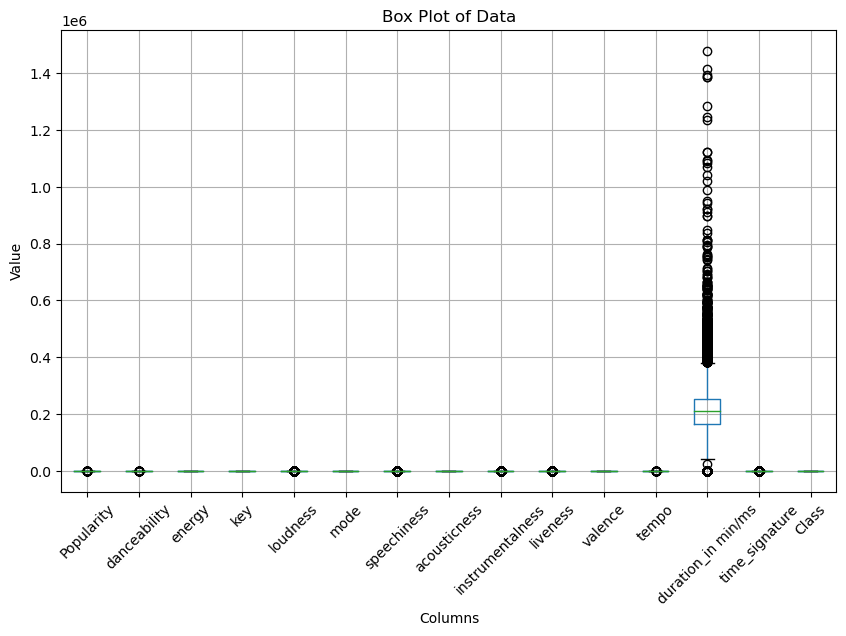

In [89]:
df.boxplot(figsize=(10, 6))  
plt.xticks(rotation=45)  
plt.title('Box Plot of Data')
plt.ylabel('Value')
plt.xlabel('Columns')
plt.show()

In [90]:
Q1 = df['duration_in min/ms'].quantile(0.25)
Q3 = df['duration_in min/ms'].quantile(0.75)
IQR = Q3 - Q1

In [91]:
threshold = 1.5

In [92]:
df.shape

(17996, 17)

In [93]:
outliers = df[(df['duration_in min/ms'] < Q1 - threshold * IQR) | (df['duration_in min/ms'] > Q3 + threshold * IQR)]

In [94]:
df = df[(df['duration_in min/ms'] > Q1 - threshold * IQR) & (df['duration_in min/ms'] < Q3 + threshold * IQR)]

In [95]:
df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Artist Name,Track Name
0,60.0,0.854,0.564,1.0,-4.964,1.0,0.0485,0.017100,0.006700,0.0849,0.8990,134.071,234596.0,4.0,5.0,Bruno Mars,That's What I Like (feat. Gucci Mane)
1,54.0,0.382,0.814,3.0,-7.230,1.0,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4.0,10.0,Boston,Hitch a Ride
2,35.0,0.434,0.614,6.0,-8.334,1.0,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4.0,6.0,The Raincoats,No Side to Fall In
3,66.0,0.853,0.597,10.0,-6.528,0.0,0.0555,0.021200,0.180894,0.1220,0.5690,107.033,173968.0,4.0,5.0,Deno,Lingo (feat. J.I & Chunkz)
4,53.0,0.167,0.975,2.0,-4.279,1.0,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4.0,10.0,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0.0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3.0,6.0,Green-House,Find Home
17992,27.0,0.638,0.223,11.0,-10.174,0.0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4.0,2.0,Micatone,All Gone
17993,34.0,0.558,0.981,4.0,-4.683,0.0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4.0,8.0,Smash Hit Combo,Peine perdue
17994,29.0,0.215,0.805,6.0,-12.757,0.0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4.0,8.0,Beherit,Salomon's Gate


In [96]:
scaler = MinMaxScaler()

In [97]:
cols_to_scale = ['Popularity','loudness','tempo','duration_in min/ms']

In [279]:
df2 = df

In [205]:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [206]:
df2

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Artist Name,Track Name
0,0.595960,0.854,0.564,1.0,0.825345,1.0,0.0485,0.017100,0.006700,0.0849,0.8990,0.504182,0.569140,4.0,5.0,Bruno Mars,That's What I Like (feat. Gucci Mane)
1,0.535354,0.382,0.814,3.0,0.762714,1.0,0.0406,0.001100,0.004010,0.1010,0.5690,0.399379,0.619426,4.0,10.0,Boston,Hitch a Ride
2,0.343434,0.434,0.614,6.0,0.732200,1.0,0.0525,0.486000,0.000196,0.3940,0.7870,0.585148,0.202551,4.0,6.0,The Raincoats,No Side to Fall In
3,0.656566,0.853,0.597,10.0,0.782117,0.0,0.0555,0.021200,0.180894,0.1220,0.5690,0.343334,0.391234,4.0,5.0,Deno,Lingo (feat. J.I & Chunkz)
4,0.525253,0.167,0.975,2.0,0.844279,1.0,0.2160,0.000169,0.016100,0.1720,0.0918,0.890800,0.555536,4.0,10.0,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,0.343434,0.166,0.109,7.0,0.489912,0.0,0.0413,0.993000,0.824000,0.0984,0.1770,0.727364,0.448402,3.0,6.0,Green-House,Find Home
17992,0.262626,0.638,0.223,11.0,0.681343,0.0,0.0329,0.858000,0.000016,0.0705,0.3350,0.140967,0.635078,4.0,2.0,Micatone,All Gone
17993,0.333333,0.558,0.981,4.0,0.833112,0.0,0.0712,0.000030,0.000136,0.6660,0.2620,0.331239,0.515224,4.0,8.0,Smash Hit Combo,Peine perdue
17994,0.282828,0.215,0.805,6.0,0.609950,0.0,0.1340,0.001290,0.916000,0.2560,0.3550,0.488072,0.525409,4.0,8.0,Beherit,Salomon's Gate


In [102]:
X = df2.drop(['Artist Name','Track Name','Class'],axis=1)
y = df2['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [103]:
y_train.value_counts()

10.0    3635
6.0     1997
9.0     1686
8.0     1338
5.0     1142
1.0     1069
2.0      933
Name: Class, dtype: int64

In [105]:
y_preds = RandomForestClassifier(n_estimators= 100, criterion='gini',random_state= 0,max_depth= 6).fit(X_train,y_train).predict(X_test)

In [116]:
f1_score(y_test,y_preds, average = 'micro')

0.4527278888512369

In [363]:
df2 = df

In [364]:
df2 = df2.drop(['Artist Name','Track Name'],axis=1)

In [365]:
data = df2.sample(frac = 1.0)
limit = int(len(data) * 0.70)
train = data[:limit] 

In [366]:
print("BEFORE", train['Class'].mean())

BEFORE 7.00271186440678


In [367]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    train1 = train[ train['Class'] == 1.0 ]
    train2 = train[ train['Class'] == 2.0 ]
    train5 = train[ train['Class'] == 5.0 ]
    train6 = train[ train['Class'] == 6.0 ]
    train8 = train[ train['Class'] == 8.0 ]
    train9 = train[ train['Class'] == 9.0]
    train10 = train[ train['Class'] == 10.0].sample(frac = i)
    train = pd.concat( [train1, train2,train5,train6,train8,train9,train10] )
    train = train.sample(frac = 1.0) # Shuffle
    print("AFTER", train['Class'].mean())

AFTER 5.864359214218896
AFTER 5.719640387275242
AFTER 5.693431672696911
AFTER 5.686829268292683
AFTER 5.684423371914656
AFTER 5.683219416934022
AFTER 5.6826171875
AFTER 5.6826171875
AFTER 5.6826171875


In [368]:
test = data[limit:]

train_y = train['Class']
del train['Class']

test_y = test['Class']
del test['Class']


clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(train, train_y)


print( "f1", f1_score(test_y, clf.predict(test),average = 'micro') ) 


f1 0.3350655219159512


# UnderSampling

In [207]:
from sklearn.utils import resample

In [208]:
class_1 = df2[df2['Class'] == 1.0]  
class_2 = df2[df2['Class'] == 2.0]
class_5 = df2[df2['Class'] == 5.0]
class_6 = df2[df2['Class'] == 6.0]
class_8 = df2[df2['Class'] == 8.0]
class_9 = df2[df2['Class'] == 9.0]
class_10 = df2[df2['Class'] == 10.0]

In [209]:
# Determine the size of the minority class or desired number of samples
min_samples = min(len(class_1), len(class_2), len(class_5), len(class_6), len(class_8),len(class_9),len(class_10))  # Adjust as needed


In [184]:
# Undersample the majority class(es)
undersampled_class_1 = resample(class_1, replace=False, n_samples=min_samples, random_state=42)  # Adjust random_state as desired
undersampled_class_2 = resample(class_2, replace=False, n_samples=min_samples, random_state=42)
undersampled_class_5 = resample(class_5, replace=False, n_samples=min_samples, random_state=42)
undersampled_class_6 = resample(class_6, replace=False, n_samples=min_samples, random_state=42)
undersampled_class_8 = resample(class_8, replace=False, n_samples=min_samples, random_state=42)
undersampled_class_9 = resample(class_9, replace=False, n_samples=min_samples, random_state=42)
undersampled_class_10 = resample(class_10, replace=False, n_samples=min_samples, random_state=42)


In [185]:
# Combine the undersampled classes into a balanced dataset
undersampled_data = pd.concat([undersampled_class_1, undersampled_class_2, undersampled_class_5, undersampled_class_6, undersampled_class_8,undersampled_class_9,undersampled_class_10])

In [186]:
undersampled_data['Class'].value_counts()

1.0     1166
2.0     1166
5.0     1166
6.0     1166
8.0     1166
9.0     1166
10.0    1166
Name: Class, dtype: int64

In [188]:
X = undersampled_data.drop(['Class'],axis=1)
y = undersampled_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [189]:
y_train.value_counts()

6.0     933
2.0     933
5.0     933
8.0     933
10.0    933
9.0     932
1.0     932
Name: Class, dtype: int64

In [190]:
y_preds = RandomForestClassifier(n_estimators= 100, criterion='gini',random_state= 0,max_depth= 6).fit(X_train,y_train).predict(X_test)

In [223]:
f1_score(y_test,y_preds,average = 'micro')

0.4543784445805266

# OverSampling

In [192]:
max_samples = max(len(class_1), len(class_2), len(class_5), len(class_6), len(class_8),len(class_9),len(class_10))  # Adjust as needed


In [193]:
overrsampled_class_1 = resample(class_1, replace=True, n_samples=max_samples, random_state=42)  # Adjust random_state as desired
overrsampled_class_2 = resample(class_2, replace=True, n_samples=max_samples, random_state=42)
overrsampled_class_5 = resample(class_5, replace=True, n_samples=max_samples, random_state=42)
overrsampled_class_6 = resample(class_6, replace=True, n_samples=max_samples, random_state=42)
overrsampled_class_8 = resample(class_8, replace=True, n_samples=max_samples, random_state=42)
overrsampled_class_9 = resample(class_9, replace=True, n_samples=max_samples, random_state=42)
overrsampled_class_10 = resample(class_10, replace=True, n_samples=max_samples, random_state=42)

In [194]:
oversampled_data = pd.concat([overrsampled_class_1, overrsampled_class_2, overrsampled_class_5,overrsampled_class_6, overrsampled_class_8,overrsampled_class_9,overrsampled_class_10])

In [195]:
oversampled_data['Class'].value_counts()

1.0     4544
2.0     4544
5.0     4544
6.0     4544
8.0     4544
9.0     4544
10.0    4544
Name: Class, dtype: int64

In [222]:
f1_score(y_test,y_preds,average = 'micro')

0.4543784445805266

# Smote

In [173]:
pip install imbalanced-learn 

In [197]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1.0     1166
2.0     1166
5.0     1166
6.0     1166
8.0     1166
9.0     1166
10.0    1166
Name: Class, dtype: int64

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [199]:
y_preds = RandomForestClassifier(n_estimators= 100, criterion='gini',random_state= 0,max_depth= 6).fit(X_train,y_train).predict(X_test)

In [221]:
f1_score(y_test ,y_preds,average = 'micro')

0.4543784445805266

# Probability

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [211]:
rf = RandomForestClassifier(n_estimators= 100, criterion='gini',random_state= 0,max_depth= 6).fit(X_train,y_train)

In [212]:
data_prob = pd.DataFrame()

In [213]:
data_prob['real'] = y_train.reset_index(drop= True)
data_prob['pred'] = pd.Series(rf.predict(X_train)).reset_index(drop= True)
data_prob['prob'] = pd.Series(rf.predict_proba(X_train)[:,1]).reset_index(drop= True)
data_prob.dropna(axis= 0 , inplace= True)

In [214]:
data_prob

,real,pred,prob
0,6.0,9.0,0.130461
1,6.0,6.0,0.124706
2,2.0,2.0,0.387964
3,6.0,6.0,0.108716
4,9.0,2.0,0.242961
...,...,...,...
6524,9.0,9.0,0.078339
6525,5.0,5.0,0.030090
6526,5.0,5.0,0.086173
6527,6.0,6.0,0.134664


In [215]:
y_train.value_counts()

6.0     933
2.0     933
5.0     933
8.0     933
10.0    933
9.0     932
1.0     932
Name: Class, dtype: int64

In [219]:
f1_score(y_test ,rf.predict(X_test),average = 'micro')

0.4543784445805266

In [220]:
f1_score(data_prob['real'],data_prob['pred'],average = 'micro')

0.5140143973043345